In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [22]:
df.rename(columns = {"Delivery Time":"Delivery", "Sorting Time":"Sorting"}, inplace=True)

EDA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [24]:
df.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

In [25]:
df[df.duplicated()]

,Delivery,Sorting


In [26]:
df.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Checking for Outliers

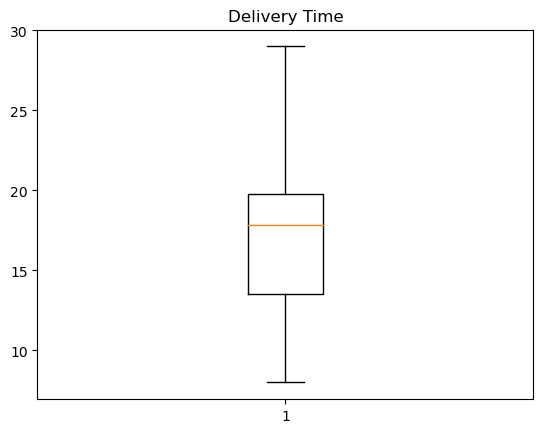

In [32]:
plt.plot(figsize=(10,5))
plt.boxplot(df["Delivery"])
plt.title("Delivery Time")
plt.show()

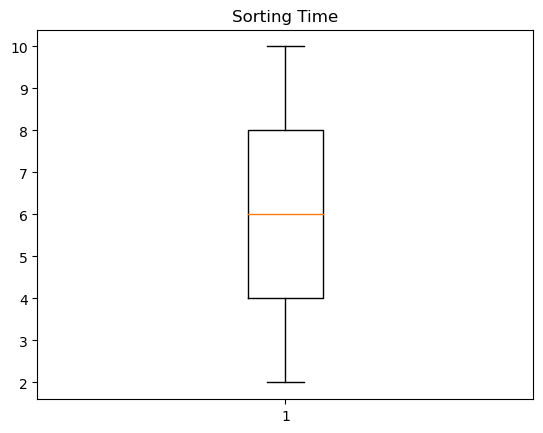

In [29]:
plt.plot(figsize=(10,5))
plt.boxplot(df["Sorting"])
plt.title("Sorting Time")
plt.show()


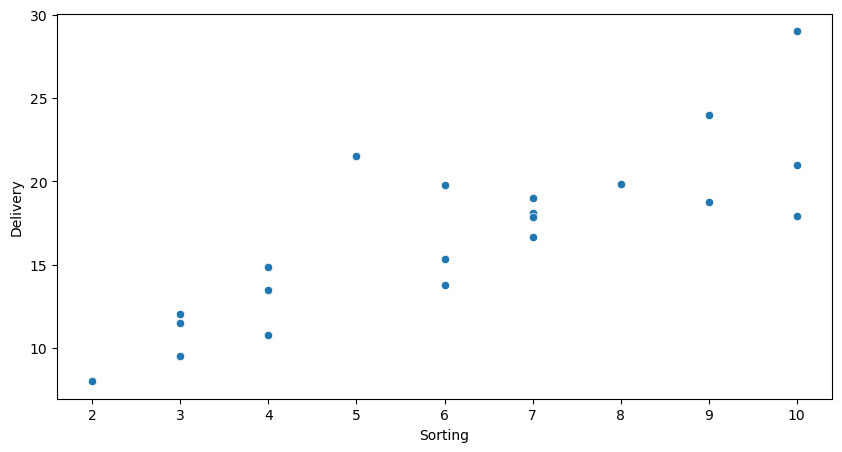

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Sorting"], y=df["Delivery"])
plt.show()

In the Scatter Plot we can see that Sorting Time Increases as Delivery Time also increases with much variation.

In [11]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [12]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

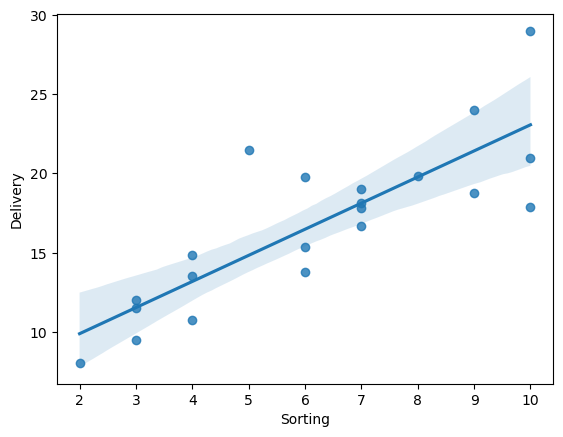

In [33]:
sns.regplot(y=df["Delivery"], x=df["Sorting"])

Feature Engineering

In [14]:
import statsmodels.api as smf
import statsmodels.formula.api as sm

Text(0.5, 1.0, 'Before Transformation')

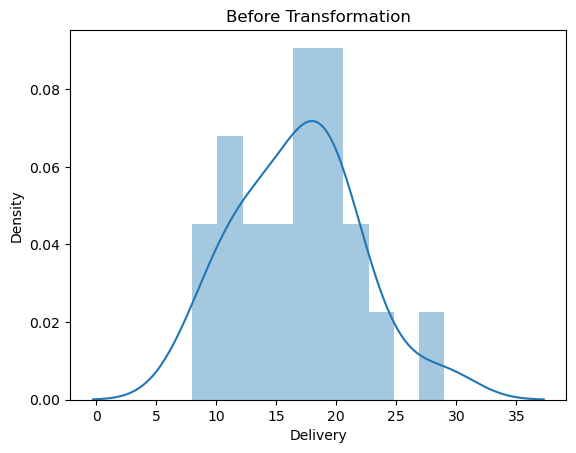

In [34]:
sns.distplot(df["Delivery"], bins=10, kde=True)
plt.title("Before Transformation")

Text(0.5, 1.0, 'Delivery Time')

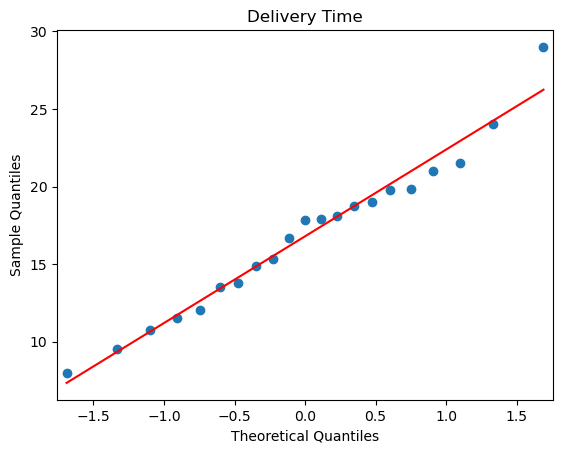

In [35]:
smf.qqplot(df["Delivery"], line='r')
plt.title("Delivery Time")

In [36]:
#OLS=Ordinary Least Squares
model = sm.ols("Delivery~Sorting",data = df).fit()

In [37]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [39]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        16:20:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation

Text(0.5, 1.0, 'After Log Transformation')

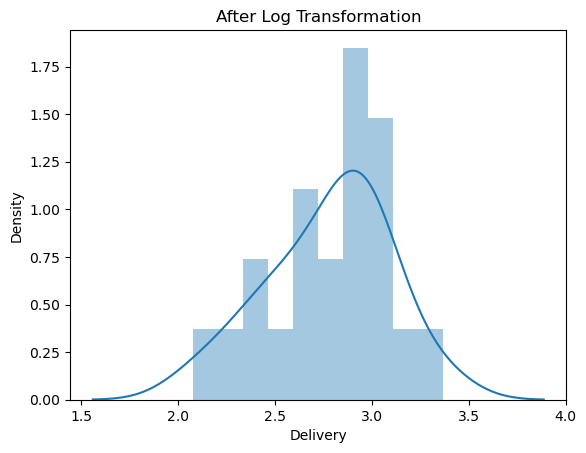

In [40]:
sns.distplot(np.log(df["Delivery"]), bins=10, kde=True)
plt.title("After Log Transformation")

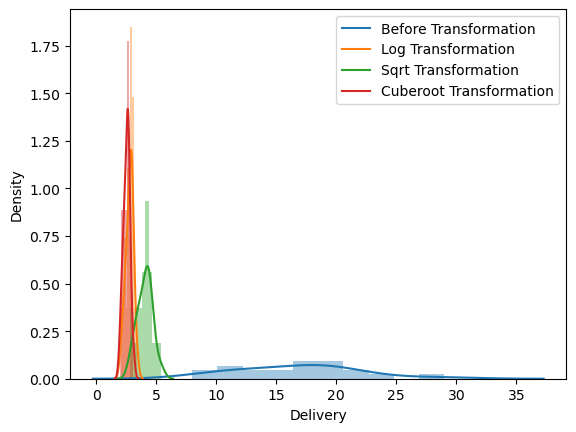

In [45]:
sns.distplot(df["Delivery"], bins=10, kde=True)
sns.distplot(np.log(df["Delivery"]), bins=10, kde=True)
sns.distplot(np.sqrt(df["Delivery"]), bins=10, kde=True)
sns.distplot(np.cbrt(df["Delivery"]), bins=10, kde=True)
labels = ["Before Transformation", "Log Transformation", "Sqrt Transformation", "Cuberoot Transformation"]
plt.legend(labels)
plt.show()

Lets see some of the transformation in Delivery Time:

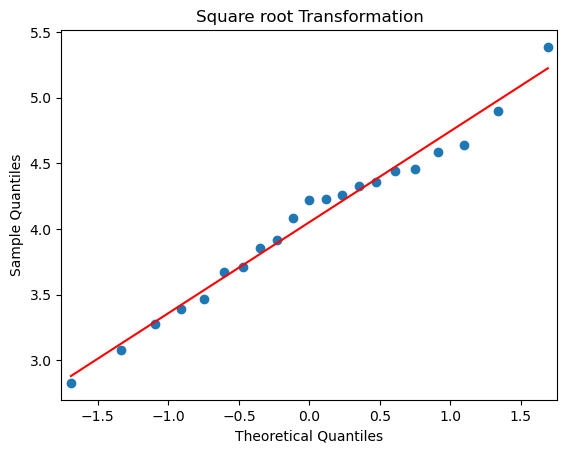

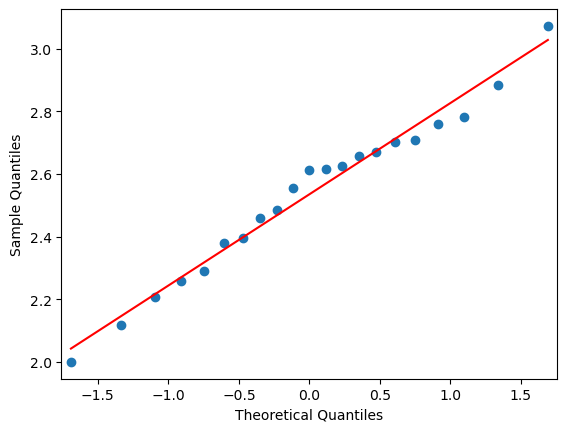

In [43]:
smf.qqplot(np.sqrt(df["Delivery"]), line='r')
plt.title("Square root Transformation")

smf.qqplot(np.cbrt(df["Delivery"]), line='r')
plt.title("Cube root Transformation")

plt.show()

Transformation of Sorting Time:

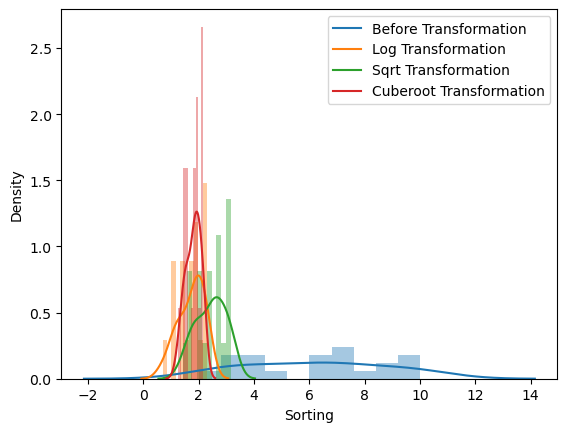

In [46]:
sns.distplot(df["Sorting"], bins=10, kde=True)
sns.distplot(np.log(df["Sorting"]), bins=10, kde=True)
sns.distplot(np.sqrt(df["Sorting"]), bins=10, kde=True)
sns.distplot(np.cbrt(df["Sorting"]), bins=10, kde=True)
labels = ["Before Transformation", "Log Transformation", "Sqrt Transformation", "Cuberoot Transformation"]
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Cuberoot Transformation')

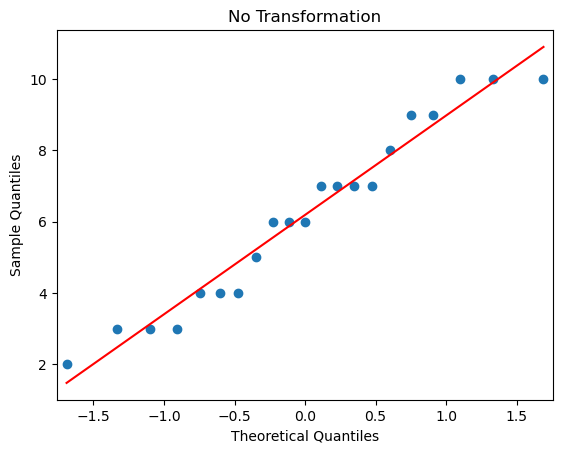

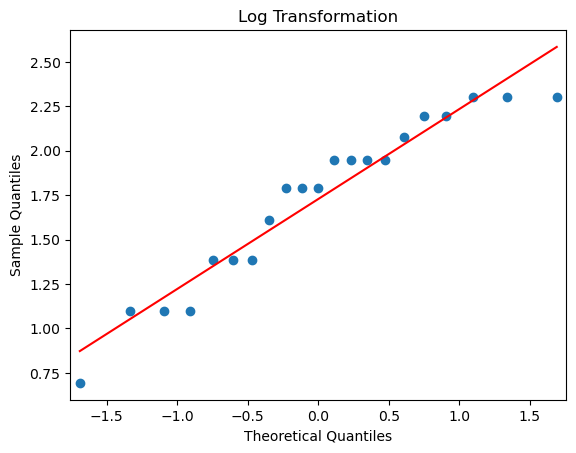

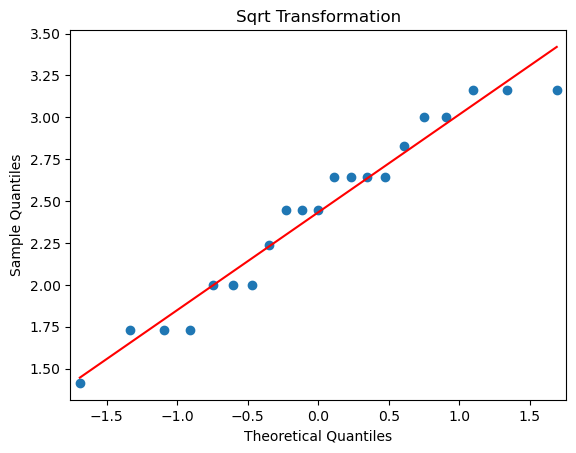

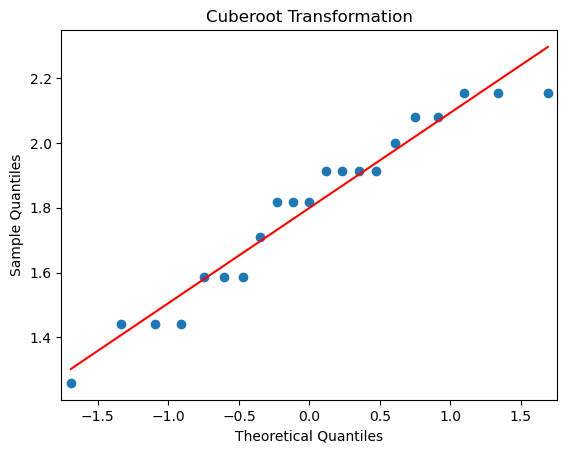

In [48]:
smf.qqplot(df["Sorting"], line='r')
plt.title("No Transformation")
smf.qqplot(np.log(df["Sorting"]), line='r')
plt.title("Log Transformation")
smf.qqplot(np.sqrt(df["Sorting"]), line='r')
plt.title("Sqrt Transformation")
smf.qqplot(np.cbrt(df["Sorting"]), line='r')
plt.title("Cuberoot Transformation")

Fitting a Linear Regression Model on Transformed Data

Log Transformation

In [50]:
model_log = sm.ols('np.log(Delivery)~np.log(Sorting)', data=df).fit()

In [51]:
model_log.params

Intercept          1.741987
np.log(Sorting)    0.597522
dtype: float64

In [52]:
model_log.fittedvalues

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [53]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        16:24:01   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Root Transformation

In [54]:
model_sqrt = sm.ols('np.sqrt(Delivery)~np.sqrt(Sorting)', data=df).fit()

In [55]:
model_sqrt.params

Intercept           1.613479
np.sqrt(Sorting)    1.002217
dtype: float64

In [56]:
model_sqrt.fittedvalues

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

In [90]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.sqrt(Delivery)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        21:17:15   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cube Root Transformation

In [58]:
model_cbrt = sm.ols('np.cbrt(Delivery)~np.cbrt(Sorting)', data=df).fit()

In [59]:
model_cbrt.params

Intercept           1.013571
np.cbrt(Sorting)    0.845585
dtype: float64

In [60]:
model_cbrt.fittedvalues

0     2.835329
1     2.355854
2     2.550101
3     2.772459
4     2.835329
5     2.550101
6     2.631117
7     2.233116
8     2.835329
9     2.772459
10    2.704741
11    2.355854
12    2.631117
13    2.233116
14    2.233116
15    2.355854
16    2.550101
17    2.631117
18    2.078941
19    2.631117
20    2.459501
dtype: float64

In [61]:
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.cbrt(Delivery)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                        16:48:11   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing

As we know, equation of line is y = mx+c <br>
let us redefine as, y = beta0 + beta1(x) 

In [62]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

here intercept (beta0) = 6.58 and independent variable, sorting time (beta1) = 1.64 <br> 
Hypothesis testing of x variable by findng t_statistics and p_values for beta1, i.e.,<br>
<br>if p_value<alpha=0.05, we reject the Null Hypothesis <br>
<br> Null Hypothesis as beta1=0 (no slope) 
<br> Alternate Hypothtesis as beta1 = m (some significant slope)


In [63]:
print(model.tvalues)
print(model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64
Intercept    0.001147
Sorting      0.000004
dtype: float64


beta0: t_value = 3.82, pvalue=0.001147 <br>
beta1: t_value = 6.38, p_value = 0.000004 <br>
Since p_value < 0.05, thus we Reject Null Hypothesis. Therefore x(sorting) variable has good slope and variance with respect y(delivery)

Measuring the Goodness of Fit by finding the r-squared values

In [64]:
print(model.rsquared)
print(model.rsquared_adj)

0.6822714748417231
0.6655489208860244


Determination Coefficient = rsquared value = 68% <br>
good fit if, rsquared >= 85%

Model Validation: 

In [66]:
from sklearn.metrics import mean_squared_error

In [71]:
model_sqrt_y_pred = np.square(model_sqrt.predict(df["Sorting"]))
model_log_y_pred = np.exp(model_log.predict(df["Sorting"]))
model_cbrt_y_pred = pow(model_cbrt.predict(df["Sorting"]), 3)

In [76]:
model_sqrt_rmse = np.sqrt(mean_squared_error(df["Delivery"],model_sqrt_y_pred))
model_log_rmse = np.sqrt(mean_squared_error(df["Delivery"],model_log_y_pred))
model_cbrt_rmse = np.sqrt(mean_squared_error(df["Delivery"],model_cbrt_y_pred))

print('model: ', np.sqrt(model.mse_resid))
print("model_log: ", model_log_rmse)
print("model_sqrt: ", model_sqrt_rmse)
print("model_cbrt: ", model_cbrt_rmse)

model:  2.9349037688901394
model_log:  2.7458288976145497
model_sqrt:  2.762294279320867
model_cbrt:  2.755584309893574


Here we can see that model_log is having least RMSE(root mean squared error)

Predicting values from model with Log Transformation on the Data

In [79]:
pred = pd.DataFrame()
pred["Sorting"] = df["Sorting"]
pred["Delivery"] = df["Delivery"]
pred["Predicted_Value"] = pd.DataFrame(np.exp(model_log.predict(pred["Sorting"])))

In [80]:
pred

,Sorting,Delivery,Predicted_Value
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


Predicting the Values without any Transformation

In [86]:
pred2 = pd.DataFrame()
pred2["Sorting"] = df["Sorting"]
pred2["Delivery"] = df["Delivery"]
pred2["Predicted_Value"] = pd.DataFrame((model.predict(pred["Sorting"])))

In [87]:
pred2

,Sorting,Delivery,Predicted_Value
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [88]:
predicted = pd.DataFrame()
predicted["Sorting Time"] = df["Sorting"]
predicted["Delivery Time"] = df["Delivery"]
predicted["Predicted_Delivery_Time"] = pred["Predicted_Value"]
predicted["Predicted_Delivery_Time_LogTransformation"] = pred2["Predicted_Value"]

In [89]:
predicted

,Sorting Time,Delivery Time,Predicted_Delivery_Time,Predicted_Delivery_Time_LogTransformation
0,10,21.00,22.597360,23.072933
1,4,13.50,13.070123,13.178814
2,6,19.75,16.653216,16.476853
3,9,24.00,21.218593,21.423913
4,10,29.00,22.597360,23.072933
5,6,15.35,16.653216,16.476853
6,7,19.00,18.259981,18.125873
7,3,9.50,11.005911,11.529794
8,10,17.90,22.597360,23.072933
9,9,18.75,21.218593,21.423913


# THANK YOU